In [1]:
# -------------------------------------------------------------------------
# Grover’s Algorithm Circuit Classification using Random Forest (Qiskit Dataset)
# -------------------------------------------------------------------------

# This notebook trains and evaluates a Random Forest classifier
# to distinguish between clean and malicious Grover quantum circuits.

# Dataset:
# - grover_full_dataset.csv (20 samples: 10 clean, 10 malicious)
# - Features include: depth, gate counts, entropy, success rate, output variation
# - Labels: 0 = clean, 1 = malicious

# Objective:
# - Benchmark Random Forest performance on structural + behavioral features
# - Visualize classification metrics: accuracy, confusion matrix, ROC curve
# - Identify key features for Trojan detection in quantum search circuits

# Tools:
# - sklearn (RandomForestClassifier, metrics, preprocessing)
# - matplotlib + seaborn for visualizations
# - pandas for dataset handling

# Author: Zeeshan Ajmal


In [2]:
# --------------------------------------------------
# Import Required Libraries
# --------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
# --------------------------------------------------
# Load Grover Dataset and Prepare Features
# --------------------------------------------------

df_grover = pd.read_csv("grover_full_dataset.csv")

print("Dataset shape:", df_grover.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_grover)

X = df_grover.drop(columns=["name", "label"])
y = df_grover["label"]

print("Class Distribution:")
print(y.value_counts())


Dataset shape: (20, 11)


,name,depth,cx,h,x,ccx,total_gates,success_rate,entropy,unique_states,label
0,grover_clean_0,12,0,11,12,2,29,16.650391,2.923333,8,0
1,grover_clean_1,11,0,11,10,2,27,18.359375,2.932354,8,0
2,grover_clean_2,12,0,11,10,2,27,16.113281,2.985350,8,0
3,grover_clean_3,11,0,11,8,2,25,18.945312,2.940776,8,0
4,grover_clean_4,12,0,11,10,2,27,18.945312,2.937411,8,0
5,grover_clean_5,11,0,11,8,2,25,18.188477,2.951969,8,0
6,grover_clean_6,12,0,11,8,2,25,21.728516,2.918748,8,0
7,grover_clean_7,10,0,11,6,2,23,17.456055,2.973883,8,0
8,grover_clean_8,10,0,11,6,1,23,52.563477,1.619115,8,0
9,grover_clean_9,10,0,11,6,1,23,45.288086,1.684894,8,0


Class Distribution:
label
0    10
1    10
Name: count, dtype: int64


In [4]:
# --------------------------------------------------
# Train-Test Split and Feature Scaling
# --------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (16, 9)
Testing set shape: (4, 9)


In [5]:
# --------------------------------------------------
# Train Random Forest Model and Make Predictions
# --------------------------------------------------

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]


In [6]:
# --------------------------------------------------
# Evaluate Model Performance and Save to Text
# --------------------------------------------------

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ ROC AUC Score: {roc_auc:.2f}\n")
print("🧾 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Clean", "Malicious"]))

with open("grover_rf_metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy:.2f}\n")
    f.write(f"ROC AUC Score: {roc_auc:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred, target_names=["Clean", "Malicious"]))


✅ Accuracy: 1.00
✅ ROC AUC Score: 1.00

🧾 Classification Report:

              precision    recall  f1-score   support

       Clean       1.00      1.00      1.00         2
   Malicious       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



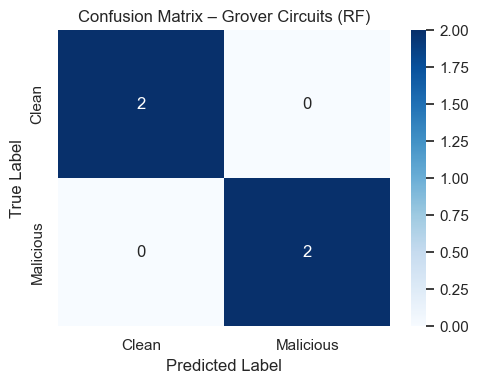

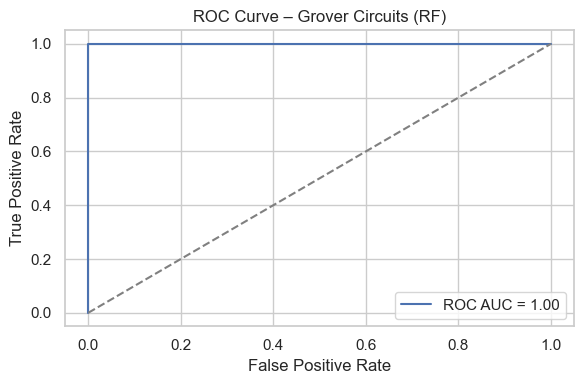

In [7]:
# --------------------------------------------------
# Confusion Matrix and ROC Curve Visualization
# --------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Clean", "Malicious"], yticklabels=["Clean", "Malicious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Grover Circuits (RF)")
plt.tight_layout()
plt.savefig("grover_rf_confusion_matrix.png", dpi=300)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Grover Circuits (RF)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("grover_rf_roc_curve.png", dpi=300)
plt.show()


C:\Users\zeesh\AppData\Local\Temp\ipykernel_2368\284175740.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")


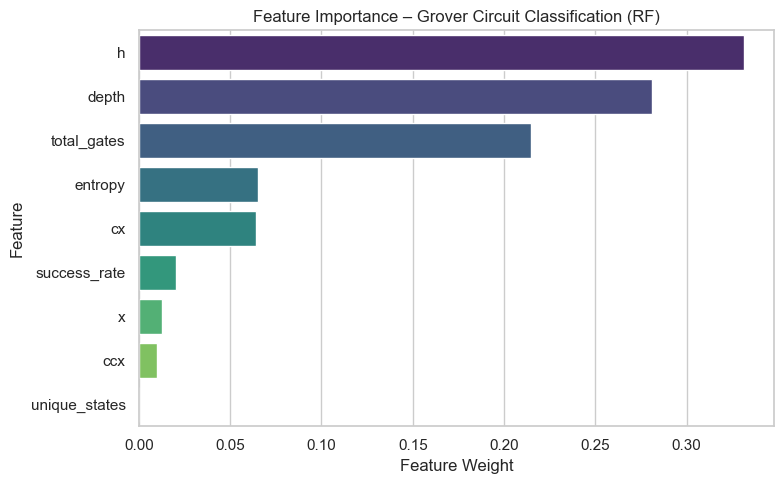

         Feature  Importance
2              h    0.331267
0          depth    0.281167
5    total_gates    0.214991
7        entropy    0.065251
1             cx    0.064404
6   success_rate    0.020444
3              x    0.012444
4            ccx    0.010032
8  unique_states    0.000000


In [8]:
# --------------------------------------------------
# Feature Importance Visualization – Random Forest
# --------------------------------------------------

feature_names = X.columns
importances = rf_model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("Feature Importance – Grover Circuit Classification (RF)")
plt.xlabel("Feature Weight")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("grover_rf_feature_importance.png", dpi=300)
plt.show()

print(feature_df)
feature_df.to_string(buf=open("grover_rf_feature_importance.txt", "w"))
